# Introduction

This script will go through all the .tif files in one folder and count the number of progenitor cells in three channels. Intermediate steps are saved as .png files for referencing. It will save the measurements into a .csv file (organized according to different images).

Notice that this script only works with 8-bit images exported from FIJI.
Notice that this set of parameters work best for mutant cells not wildtype cells:
**max_sigma=15, min_sigma = 8, num_sigma=3, overlap = 0.1, threshold=.05**

Shengyao Chen

In [2]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import mahotas as mh
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

from skimage.feature import blob_log
from math import sqrt

In [6]:
def blob_counting(file):
    image = io.imread(file)
    
    red = image[0, ..., 0]
    green = image[1, ..., 0]
    blue = image[2, ..., 0]
    
    red_blobs_log = blob_log(red, max_sigma=20, min_sigma = 5, num_sigma=5, overlap = 0.5, threshold=.08)
    try:
        red_blobs_log[:, 2] = red_blobs_log[:, 2] * sqrt(2)
    except Exception as e:
        print(e)
        pass

# for mt, max_sigma=15, min_sigma = 8, num_sigma=3, overlap = 0.1, threshold=.05
    green_blobs_log = blob_log(green, max_sigma=15, min_sigma = 8, num_sigma=3, overlap = 0.1, threshold=.05)
    try:
        green_blobs_log[:, 2] = green_blobs_log[:, 2] * sqrt(2)
    except Exception as e:
        print(e)
        pass
    
    blue_blobs_log = blob_log(blue, max_sigma=20, min_sigma = 10, num_sigma=5, overlap = 0.5, threshold=.08)
    try:
        blue_blobs_log[:, 2] = blue_blobs_log[:, 2] * sqrt(2)
    except Exception as e:
        print(e)
        pass
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    plt.tight_layout()
    
    ax1.imshow(red, interpolation = 'nearest')
    ax1.set_axis_off()
    ax1.set_title(file.split('.')[0] + '_red')
    for blob in red_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'red', linewidth=1.5, fill=False)
        ax1.add_patch(c)
        
    ax2.imshow(green, interpolation = 'nearest')
    ax2.set_axis_off()
    ax2.set_title(file.split('.')[0] + '_green')
    for blob in green_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'green', linewidth=1.5, fill=False)
        ax2.add_patch(c)
    
    ax3.imshow(blue, interpolation = 'nearest')
    ax3.set_axis_off()
    ax3.set_title(file.split('.')[0] + '_blue')
    for blob in blue_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'blue', linewidth=1.5, fill=False)
        ax3.add_patch(c)
    fig.savefig(file.split('.')[0] + '_analysis')
    
    return [len(red_blobs_log), len(green_blobs_log), len(blue_blobs_log)]

too many indices for array
CPU times: user 1min 12s, sys: 6.11 s, total: 1min 18s
Wall time: 1min 58s


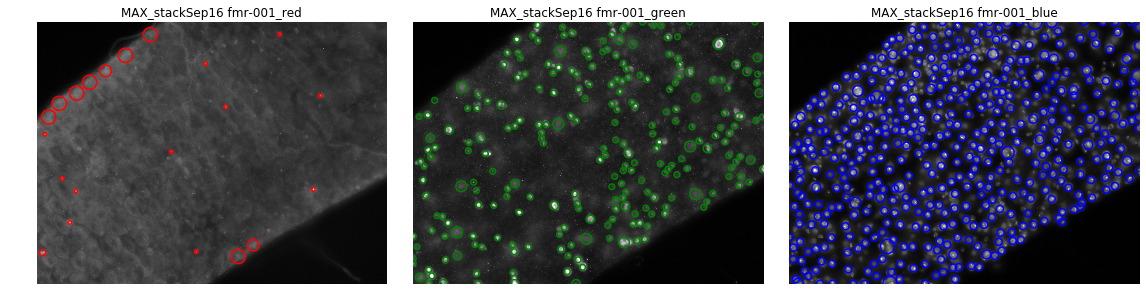

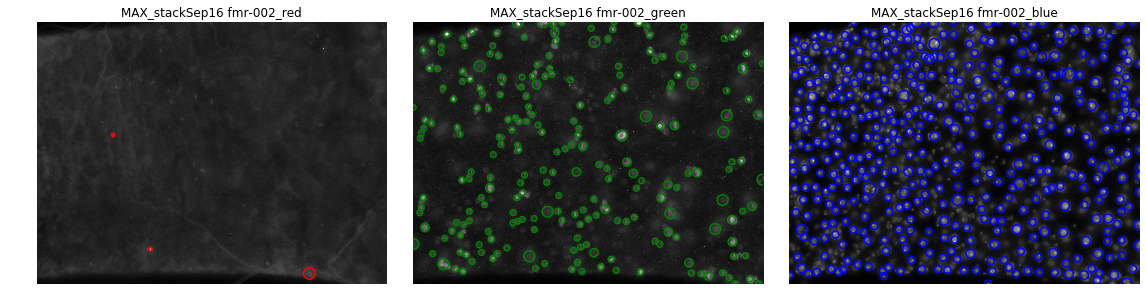

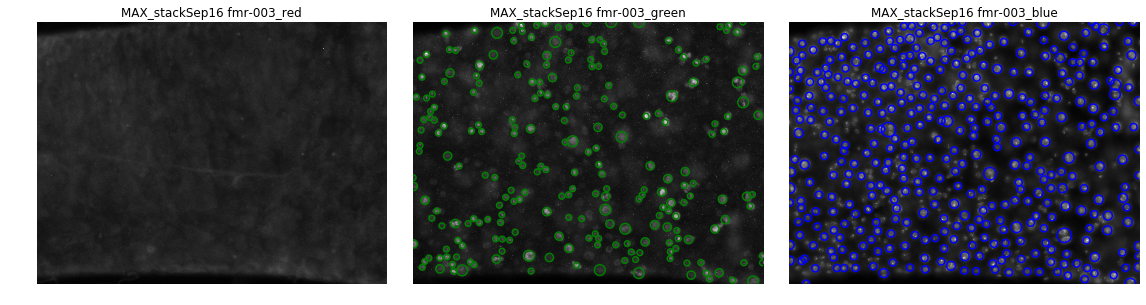

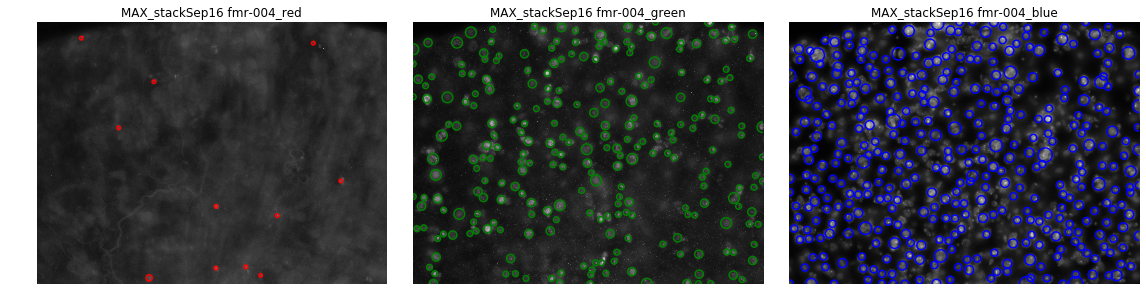

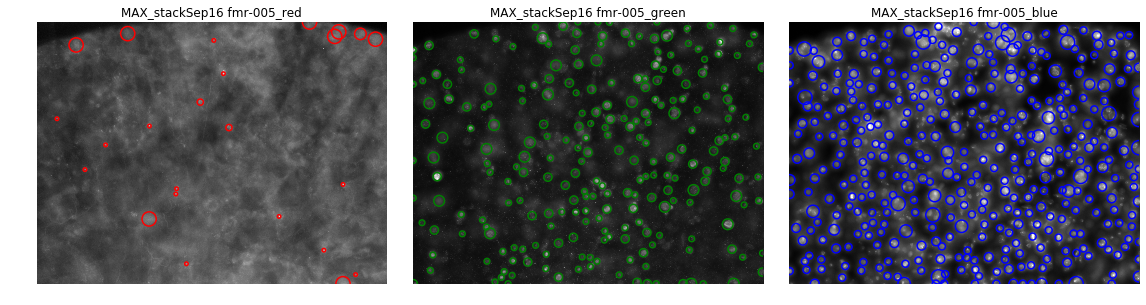

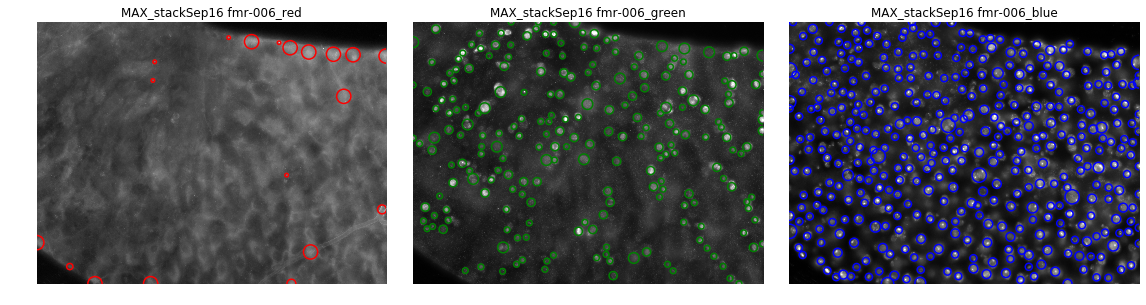

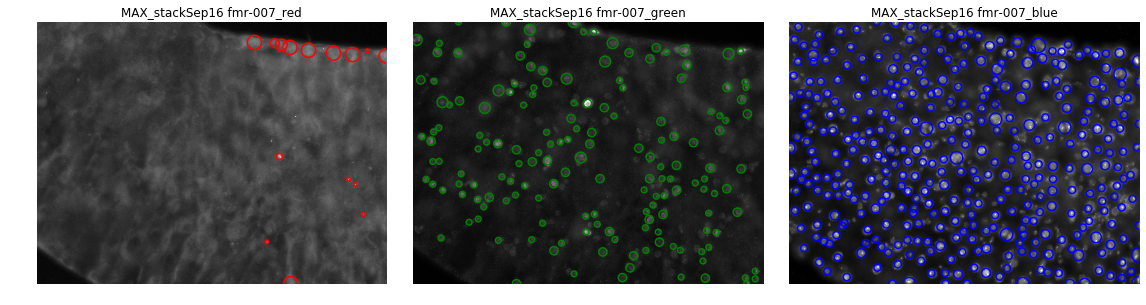

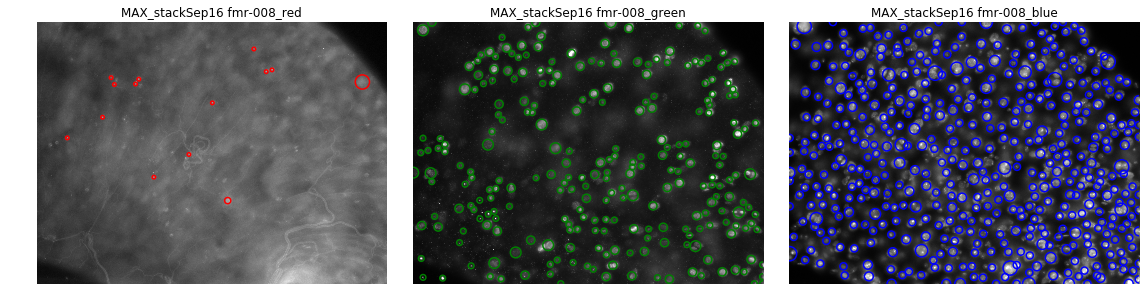

In [7]:
%%time

current_path = %pwd
file_list = os.listdir(current_path)
file_list = [i for i in file_list if i[:3] == 'MAX' and i[-3:] == 'tif']
result_dictionary = {}
for file in file_list:
    result_dictionary[file.split('.')[0]] = blob_counting(file)

In [7]:
import pandas as pd

analysis = pd.DataFrame(result_dictionary, index = ['red', 'green', 'blue'])
analysis = analysis.transpose()
analysis.to_csv('measurement_result.csv')
analysis

red  green  blue
MAX_stackSep16 fmr-001   21    227   453
MAX_stackSep16 fmr-002    3    190   428
MAX_stackSep16 fmr-003    0    182   396
MAX_stackSep16 fmr-004   11    195   380
MAX_stackSep16 fmr-005   24    178   388
MAX_stackSep16 fmr-006   19    201   401
MAX_stackSep16 fmr-007   15     83   368
MAX_stackSep16 fmr-008   14    241   451